# Proper Bandwidth with R

In [4]:
# Library
library(dplyr)
library(tidyverse)
library(sf)
library(sparr)
library(spatstat)

setwd('/Users/dangchan/Desktop/Github/LocalSecurity_competition')

In [5]:
# load area(Daejeon grid)
DJ_area = read_sf('data/CENSUS/grid_DJ_100M.gpkg')
Whole_area = read_sf('data/CENSUS/grid_100M.gpkg') # 대전 + 세종 그리드

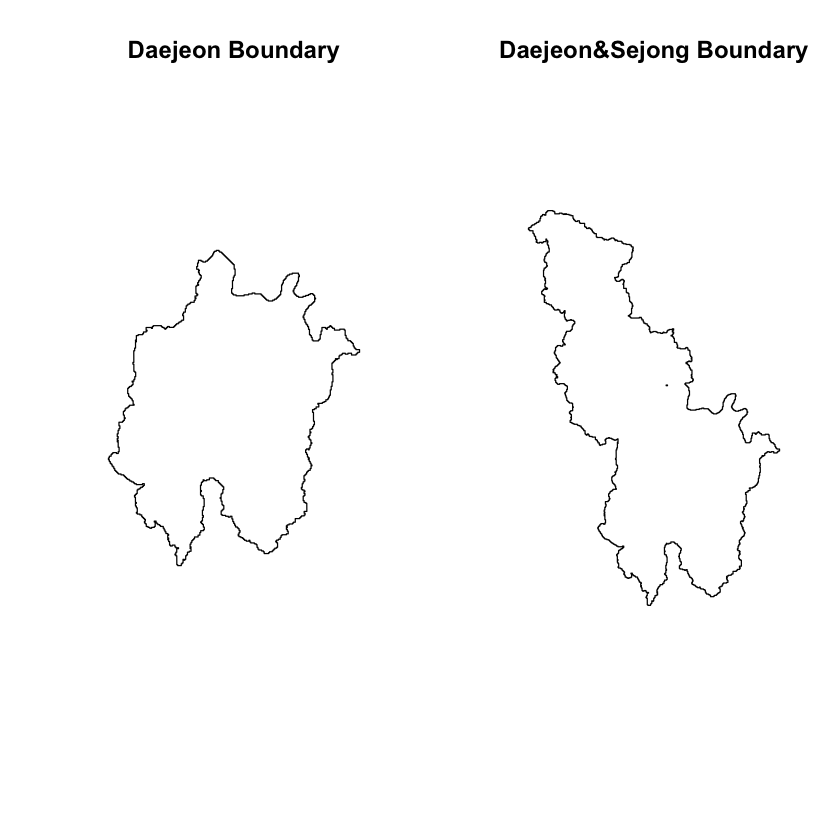

In [6]:
# get boundary of area
par(mfrow=c(1,2))
boundary_DJ = st_union(DJ_area$geom)
boundary_DJSJ = st_union(Whole_area$geom)
plot(boundary_DJ, bg='white', main = 'Daejeon Boundary')
plot(boundary_DJSJ, bg='white', main = 'Daejeon&Sejong Boundary')

In [7]:
df_crime_DJ = read_csv('STKDE/data_100M.csv')
df_crime_DJ = df_crime_DJ[,c('X','Y')]
df_crime_DJ = df_crime_DJ %>% unique()

Rows: 2819 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): geometry
dbl  (3): T, X, Y
dttm (1): RECV_CPLT_DM

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
crime_DJ <- ppp(x=df_crime_DJ$X, y=df_crime_DJ$Y, window = as.owin(boundary_DJ))

Warning message:
“48 points were rejected as lying outside the specified window”


### Oversmoothing

In [9]:
OS(crime_DJ)

[1] 1179.698

In [10]:
h_LIK <- LIK.density(crime_DJ)

Searching for optimal h in [0.0897681507077683, 4691.80011657562]...Done.


In [14]:
h_LIK

[1] 636.6084

In [11]:
f <- bivariate.density(crime_DJ, h0=h_LIK, resolution = 100, leaveoneout = TRUE)

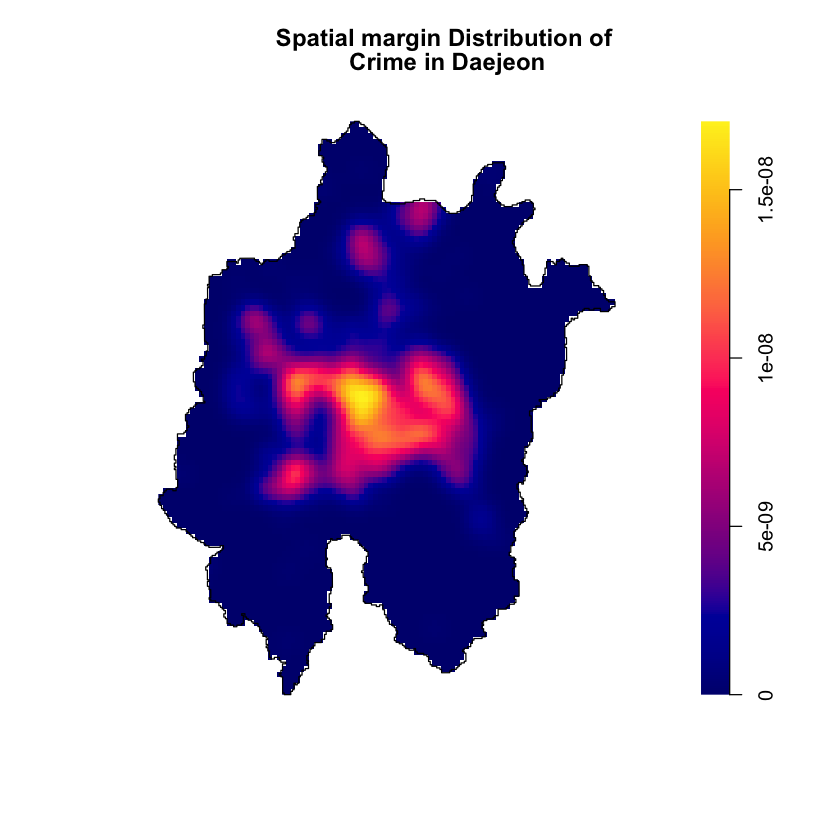

In [12]:
plot(f$z, box=FALSE, main="Spatial margin Distribution of\n Crime in Daejeon") 
plot(Window(crime_DJ),add=TRUE)

In [13]:
f

Bivariate Kernel Density/Intensity Estimate

Bandwidth
  Fixed smoothing with h0 = 636.6084 units (to 4 d.p.)

No. of observations
  1684 